## 数据时间序列

    对于金融时间序列，通过以日期和时间为索引。比如：一段周期内的股票价格。本章基于DataFrame和Series对于对于时间序列数据的处理进行分析。

    通过NumPy产生符合正态分布的4列数据，一共9组：

In [1]:
import numpy as np
import pandas as pd
a = np.random.standard_normal((9, 4))
a.round(6)

array([[-0.100054, -0.246125,  1.447586,  2.491249],
       [-0.353933,  0.560573, -0.931687,  0.120224],
       [-0.40892 ,  1.206156, -0.226544,  0.906043],
       [ 1.306979,  0.818487,  0.182831, -0.531732],
       [ 1.565232, -0.902645,  0.60277 ,  1.431309],
       [-1.517596, -0.133967, -0.797734, -1.305109],
       [-0.592685,  0.467948,  0.147663,  0.259357],
       [ 0.612302,  0.467229,  1.00277 , -1.047602],
       [ 0.123674,  0.36556 ,  0.03615 , -1.147418]])

    通过上述的NumPy数组构建DataFrame:

In [2]:
df = pd.DataFrame(a)
df

,0,1,2,3
0,-0.100054,-0.246125,1.447586,2.491249
1,-0.353933,0.560573,-0.931687,0.120224
2,-0.408920,1.206156,-0.226544,0.906043
3,1.306979,0.818487,0.182831,-0.531732
4,1.565232,-0.902645,0.602770,1.431309
5,-1.517596,-0.133967,-0.797734,-1.305109
6,-0.592685,0.467948,0.147663,0.259357
7,0.612302,0.467229,1.002770,-1.047602
8,0.123674,0.365560,0.036150,-1.147418


    默认列为[0,1,2,3]，每列的index索引为：0~8。对于列名重新命名：

In [3]:
df.columns = [['No1', 'No2', 'No3', 'No4']]
df

,No1,No2,No3,No4
0,-0.100054,-0.246125,1.447586,2.491249
1,-0.353933,0.560573,-0.931687,0.120224
2,-0.408920,1.206156,-0.226544,0.906043
3,1.306979,0.818487,0.182831,-0.531732
4,1.565232,-0.902645,0.602770,1.431309
5,-1.517596,-0.133967,-0.797734,-1.305109
6,-0.592685,0.467948,0.147663,0.259357
7,0.612302,0.467229,1.002770,-1.047602
8,0.123674,0.365560,0.036150,-1.147418


    取出‘No2’列的所以为3的数据：

In [4]:
df['No2'][3]

0.81848691270397533

    将上述的数据按照日期进行索引，先生成日期索引，然后更换DataFrame中的索引：

In [5]:
dates = pd.date_range('2015-1-1', periods=9, freq='M')
dates
df.index=dates
df

,No1,No2,No3,No4
2015-01-31,-0.100054,-0.246125,1.447586,2.491249
2015-02-28,-0.353933,0.560573,-0.931687,0.120224
2015-03-31,-0.408920,1.206156,-0.226544,0.906043
2015-04-30,1.306979,0.818487,0.182831,-0.531732
2015-05-31,1.565232,-0.902645,0.602770,1.431309
2015-06-30,-1.517596,-0.133967,-0.797734,-1.305109
2015-07-31,-0.592685,0.467948,0.147663,0.259357
2015-08-31,0.612302,0.467229,1.002770,-1.047602
2015-09-30,0.123674,0.365560,0.036150,-1.147418


    按照月度的频率，一共生成9期。

    对于各列求和：

In [6]:
df.sum()

No1    0.635000
No2    2.603216
No3    1.463804
No4    1.176320
dtype: float64

    对于上述的数据输入统计信息，DataFrame中有describe方法:

In [7]:
df.describe()

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,0.070556,0.289246,0.162645,0.130702
std,0.965687,0.627516,0.777704,1.294408
min,-1.517596,-0.902645,-0.931687,-1.305109
25%,-0.408920,-0.133967,-0.226544,-1.047602
50%,-0.100054,0.467229,0.147663,0.120224
75%,0.612302,0.560573,0.602770,0.906043
max,1.565232,1.206156,1.447586,2.491249


    对于上述的'No1'列累加值进行绘图：

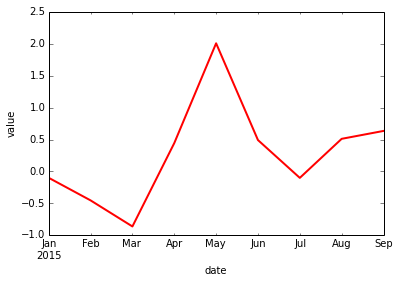

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
df['No1'].cumsum().plot(style='r',lw=2)
plt.xlabel('date')
plt.ylabel('value')

## 分组操作

    pandas具有很强的数据分组操作能力，基于之前的例子，我们新增一列，通过月度进行分组：

In [9]:
df['Quarter'] = ['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3']
df

,No1,No2,No3,No4,Quarter
2015-01-31,-0.100054,-0.246125,1.447586,2.491249,Q1
2015-02-28,-0.353933,0.560573,-0.931687,0.120224,Q1
2015-03-31,-0.408920,1.206156,-0.226544,0.906043,Q1
2015-04-30,1.306979,0.818487,0.182831,-0.531732,Q2
2015-05-31,1.565232,-0.902645,0.602770,1.431309,Q2
2015-06-30,-1.517596,-0.133967,-0.797734,-1.305109,Q2
2015-07-31,-0.592685,0.467948,0.147663,0.259357,Q3
2015-08-31,0.612302,0.467229,1.002770,-1.047602,Q3
2015-09-30,0.123674,0.365560,0.036150,-1.147418,Q3


   上面的DataFrame增加了Quarter列，其中的值为字符串'Q1'...'Q3'.

In [10]:
groups = df.groupby('Quarter')

    按照'Quarter'列进行分组。

In [11]:
groups.mean()

,No1,No2,No3,No4
Quarter,,,,
Q1,-0.287636,0.506868,0.096452,1.172505
Q2,0.451538,-0.072708,-0.004044,-0.135178
Q3,0.047764,0.433579,0.395528,-0.645221


    基于'Quarter'进行分组后，对于其他列的值求出平均值。

In [12]:
groups.max()

,No1,No2,No3,No4
Quarter,,,,
Q1,-0.100054,1.206156,1.447586,2.491249
Q2,1.565232,0.818487,0.602770,1.431309
Q3,0.612302,0.467948,1.002770,0.259357


   基于'Quarter'进行分组后，对于其他列的值求出最大值。

## 多列分组

    可以基于多列进行分组。基于上面的数据，再增加一列：

In [13]:
df['Odd_Even'] = ['Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even',
'Odd', 'Even', 'Odd']

    增加一列'Odd_Even'，根据'Quarter'和'Odd_Even'进行分组。

In [14]:
groups = df.groupby(['Quarter', 'Odd_Even'])
groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [15]:
 groups.mean()

No1       No2       No3       No4
Quarter Odd_Even                                        
Q1      Even     -0.353933  0.560573 -0.931687  0.120224
        Odd      -0.254487  0.480016  0.610521  1.698646
Q2      Even     -0.105308  0.342260 -0.307451 -0.918421
        Odd       1.565232 -0.902645  0.602770  1.431309
Q3      Even      0.612302  0.467229  1.002770 -1.047602
        Odd      -0.234505  0.416754  0.091906 -0.444031

    基于两列对于数据进行分组。

## 金融数据

    通过pandas内建的DataReader函数从Yahoo主页抓取金融数据并进行分析展示。

In [40]:
import pandas.io.data as web
SP = web.DataReader(name='^GSPC', data_source='yahoo',start='2015-1-1',end='2016-1-1')
SP.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-01-02 to 2015-12-31
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


    从yahoo网站获取了标普指数从2005年到2016年的数据，一共2769条记录。

   展示最后的五条记录。

In [41]:
SP.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-12-24,2063.520020,2067.360107,2058.729980,2060.989990,1411860000,2060.989990
2015-12-28,2057.770020,2057.770020,2044.199951,2056.500000,2492510000,2056.500000
2015-12-29,2060.540039,2081.560059,2060.540039,2078.360107,2542000000,2078.360107
2015-12-30,2077.340088,2077.340088,2061.969971,2063.360107,2367430000,2063.360107
2015-12-31,2060.590088,2062.540039,2043.619995,2043.939941,2655330000,2043.939941


   根据收盘点位绘图：

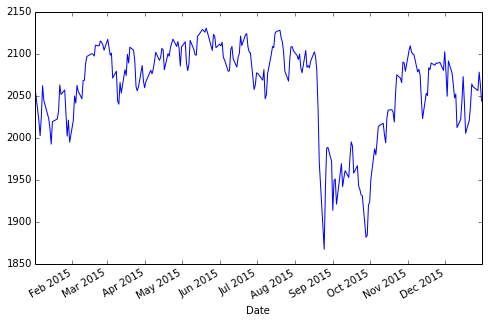

In [42]:
SP['Close'].plot(figsize=(8, 5))

        在上述的DataFrame中，对于收盘价格，计算对数收益率：

In [43]:
%%time
SP['Ret_Loop'] = 0.0
for i in range(1, len(SP)):
    SP['Ret_Loop'][i] = np.log(SP['Close'][i] / SP['Close'][i - 1])

/Library/Python/2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


CPU times: user 7.36 s, sys: 48.6 ms, total: 7.41 s
Wall time: 7.48 s


In [46]:
SP[['Close', 'Ret_Loop']].tail()

,Close,Ret_Loop
Date,,
2015-12-24,2060.989990,-0.001600
2015-12-28,2056.500000,-0.002181
2015-12-29,2078.360107,0.010574
2015-12-30,2063.360107,-0.007243
2015-12-31,2043.939941,-0.009456


   也可以通过shift方法，

In [49]:
%time SP['Return'] = np.log(SP['Close'] / SP['Close'].shift(1))

CPU times: user 1.28 ms, sys: 298 µs, total: 1.58 ms
Wall time: 1.47 ms


In [51]:
SP[['Close', 'Ret_Loop', 'Return']].tail()

,Close,Ret_Loop,Return
Date,,,
2015-12-24,2060.989990,-0.001600,-0.001600
2015-12-28,2056.500000,-0.002181,-0.002181
2015-12-29,2078.360107,0.010574,0.010574
2015-12-30,2063.360107,-0.007243,-0.007243
2015-12-31,2043.939941,-0.009456,-0.009456
